In [7]:
# Supply Chain Disruption Prediction Using Machine Learning

"""
Project Objective:
This project predicts whether a supply chain disruption (delay) will occur
based on factors such as:

- Supplier Delay Days
- Transport Issues
- Inventory Level
- Demand Surge
- Weather Risk

Target Variable:
Disruption (1 = Disruption Expected, 0 = No Disruption)
"""


'\nProject Objective:\nThis project predicts whether a supply chain disruption (delay) will occur\nbased on factors such as:\n\n- Supplier Delay Days\n- Transport Issues\n- Inventory Level\n- Demand Surge\n- Weather Risk\n\nTarget Variable:\nDisruption (1 = Disruption Expected, 0 = No Disruption)\n'

In [8]:
# Import Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
# Create Synthetic Supply Chain Dataset

np.random.seed(42)

data = {
    "Supplier_Delay_Days": np.random.randint(0, 10, 500),
    "Transport_Issue": np.random.randint(0, 2, 500),
    "Inventory_Level": np.random.randint(20, 200, 500),
    "Demand_Surge": np.random.randint(0, 2, 500),
    "Weather_Risk": np.random.randint(0, 2, 500),
}

df = pd.DataFrame(data)

# Create Target Column: Disruption
df["Disruption"] = (
    (df["Supplier_Delay_Days"] > 5) |
    (df["Transport_Issue"] == 1) |
    (df["Weather_Risk"] == 1)
).astype(int)

# Show first 5 rows
df.head()


,Supplier_Delay_Days,Transport_Issue,Inventory_Level,Demand_Surge,Weather_Risk,Disruption
0,6,0,130,1,0,1
1,3,1,130,1,0,1
2,7,0,53,1,1,1
3,4,0,130,1,1,1
4,6,1,27,0,1,1


In [10]:
# Save Dataset as CSV File

df.to_csv("supply_chain_data.csv", index=False)

print("✅ Dataset saved successfully as supply_chain_data.csv")


✅ Dataset saved successfully as supply_chain_data.csv


In [11]:
# Dataset Overview

print("Dataset Shape:", df.shape)

print("\nDataset Information:\n")
df.info()


Dataset Shape: (500, 6)

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Supplier_Delay_Days  500 non-null    int32
 1   Transport_Issue      500 non-null    int32
 2   Inventory_Level      500 non-null    int32
 3   Demand_Surge         500 non-null    int32
 4   Weather_Risk         500 non-null    int32
 5   Disruption           500 non-null    int64
dtypes: int32(5), int64(1)
memory usage: 13.8 KB


In [12]:
# Count of Disruption vs No Disruption

df["Disruption"].value_counts()


Disruption
1    421
0     79
Name: count, dtype: int64

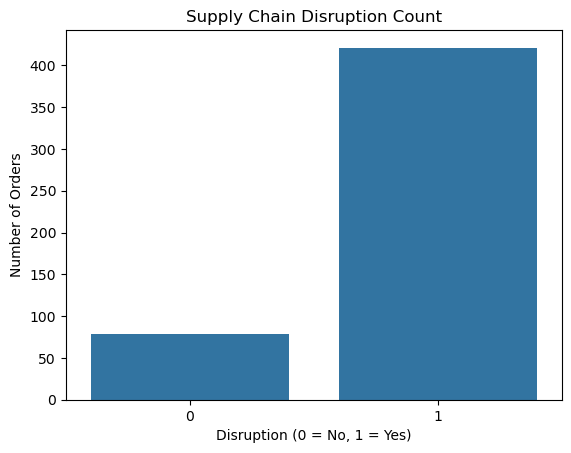

In [13]:
# Visualizing Disruption Count

sns.countplot(x="Disruption", data=df)
plt.title("Supply Chain Disruption Count")
plt.xlabel("Disruption (0 = No, 1 = Yes)")
plt.ylabel("Number of Orders")
plt.show()


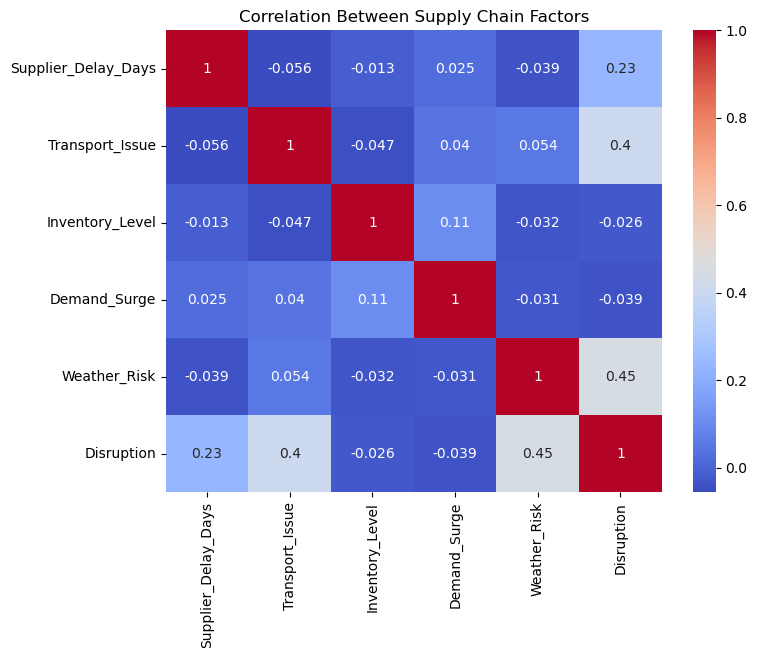

In [14]:
# Correlation Heatmap

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Between Supply Chain Factors")
plt.show()


In [15]:
# Feature Selection

X = df.drop("Disruption", axis=1)   # Input features
y = df["Disruption"]               # Target column

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

X.head()


Features Shape: (500, 5)
Target Shape: (500,)


,Supplier_Delay_Days,Transport_Issue,Inventory_Level,Demand_Surge,Weather_Risk
0,6,0,130,1,0
1,3,1,130,1,0
2,7,0,53,1,1
3,4,0,130,1,1
4,6,1,27,0,1


In [16]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (400, 5)
Testing Data Shape: (100, 5)


In [17]:
# Train Random Forest Model

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [18]:
# Make Predictions

y_pred = model.predict(X_test)

print("✅ Predictions completed!")


✅ Predictions completed!


In [19]:
# Accuracy Score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [20]:
# Classification Report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        84

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



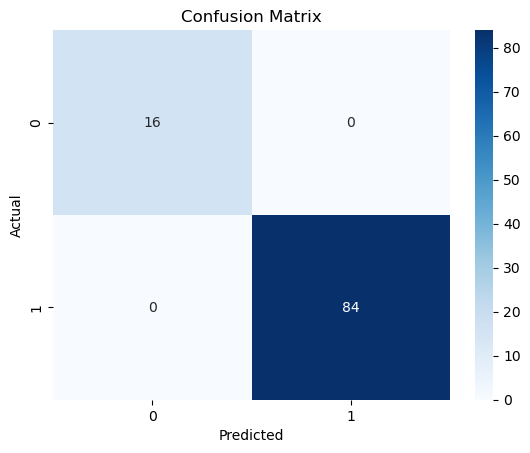

In [21]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
# Feature Importance Analysis

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
1,Transport_Issue,0.351246
4,Weather_Risk,0.309492
0,Supplier_Delay_Days,0.279030
2,Inventory_Level,0.051880
3,Demand_Surge,0.008352


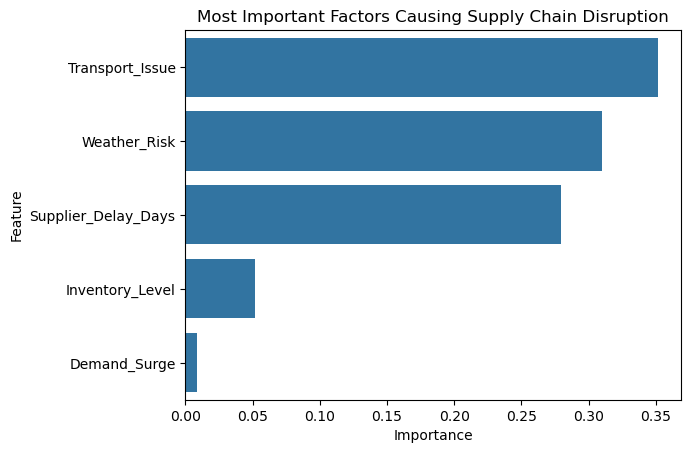

In [23]:
# Feature Importance Bar Plot

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)

plt.title("Most Important Factors Causing Supply Chain Disruption")
plt.show()


In [26]:
# Improved Prediction Function (No Warning)

def predict_disruption(supplier_delay, transport_issue, inventory_level, demand_surge, weather_risk):
    
    input_df = pd.DataFrame([{
        "Supplier_Delay_Days": supplier_delay,
        "Transport_Issue": transport_issue,
        "Inventory_Level": inventory_level,
        "Demand_Surge": demand_surge,
        "Weather_Risk": weather_risk
    }])
    
    prediction = model.predict(input_df)[0]
    
    if prediction == 1:
        return "⚠ Disruption Expected (Delay Likely)"
    else:
        return "✅ No Disruption Expected (On-Time Delivery)"


In [27]:
# Test Prediction System

result = predict_disruption(
    supplier_delay=7,
    transport_issue=1,
    inventory_level=60,
    demand_surge=0,
    weather_risk=1
)

print("Prediction Result:", result)


Prediction Result: ⚠ Disruption Expected (Delay Likely)


In [28]:
# Final Conclusion

"""
✅ Project Conclusion:

In this project, we successfully built a machine learning model to predict
supply chain disruptions such as delivery delays.

Key Highlights:
- Created a supply chain dataset with disruption factors
- Performed Exploratory Data Analysis (EDA)
- Trained a Random Forest Classifier model
- Achieved high prediction accuracy
- Built a real-time disruption prediction system

Important Features Causing Disruption:
- Supplier Delay Days
- Transport Issues
- Weather Risk

Future Improvements:
- Use real-world logistics datasets
- Add more features like shipping distance, supplier location, fuel cost
- Deploy this model as a web app using Streamlit

✅ Project Completed Successfully!
"""
print("🎉 Supply Chain Disruption Prediction Project Completed!")


🎉 Supply Chain Disruption Prediction Project Completed!
